In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'SpendScore'},inplace=True)

In [7]:
df.head()

,CustomerID,Gender,Age,Income,SpendScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.drop('CustomerID',axis=1,inplace=True)

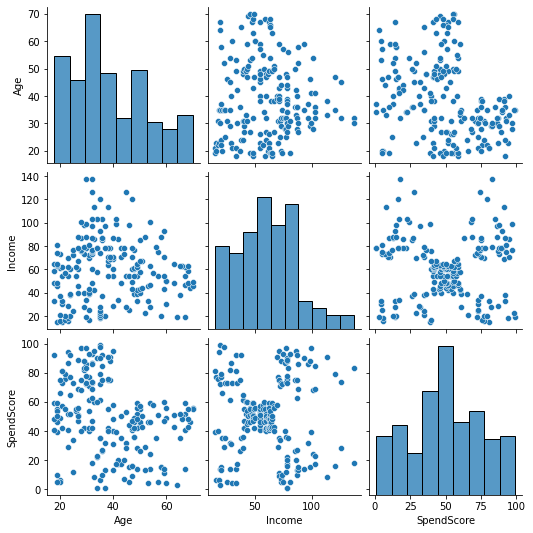

In [9]:
sns.pairplot(df)

<AxesSubplot:>

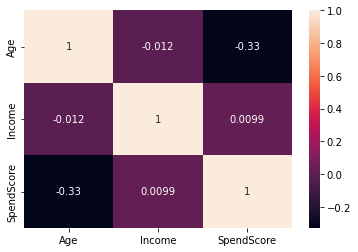

In [10]:
sns.heatmap(df.corr(),annot=True)

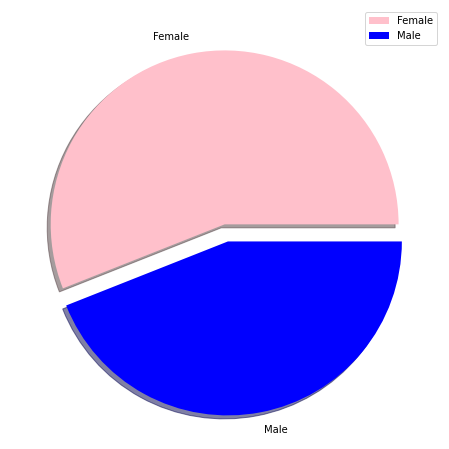

In [12]:
plt.figure(figsize=(8,8))
size = df['Gender'].value_counts()
label = ['Female','Male']
color = ['pink','blue']
explode = [0,0.1]
plt.pie(size,explode=explode,labels=label,colors=color,shadow=True)
plt.legend()
plt.show()

In [13]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [14]:
df.head()

,Gender,Age,Income,SpendScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [15]:
X = df.iloc[:,[2,3]].values

In [16]:
X.shape

(200, 2)

In [17]:
model = db.fit(X)

In [18]:
label = model.labels_

In [19]:
label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

# DBSCAN

In [20]:
from sklearn import metrics

# identifying the points which makes up our core points
sample_cores = np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_] = True

# Calculating the number of clusters
n_clusters = len(set(label)) - (1 if -1 in label else 0)
print('Number of Clusters',n_clusters)


Number of Clusters 9


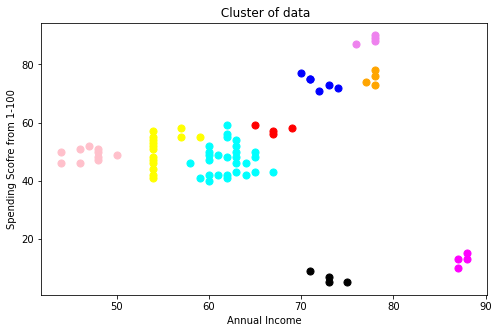

In [22]:
y_means = db.fit_predict(X)
plt.figure(figsize=(8,5))
plt.scatter(X[y_means == 0, 0],X[y_means == 0, 1], s=50, c='pink')
plt.scatter(X[y_means == 1, 0],X[y_means == 1, 1], s=50, c='yellow')
plt.scatter(X[y_means == 2, 0],X[y_means == 2, 1], s=50, c='cyan')
plt.scatter(X[y_means == 3, 0],X[y_means == 3, 1], s=50, c='red')
plt.scatter(X[y_means == 4, 0],X[y_means == 4, 1], s=50, c='blue')
plt.scatter(X[y_means == 5, 0],X[y_means == 5, 1], s=50, c='black')
plt.scatter(X[y_means == 6, 0],X[y_means == 6, 1], s=50, c='violet')
plt.scatter(X[y_means == 7, 0],X[y_means == 7, 1], s=50, c='orange')
plt.scatter(X[y_means == 8, 0],X[y_means == 8, 1], s=50, c='magenta')
plt.xlabel('Annual Income')
plt.ylabel('Spending Scofre from 1-100')
plt.title(' Cluster of data')
plt.show()

# hierarchical Clustering

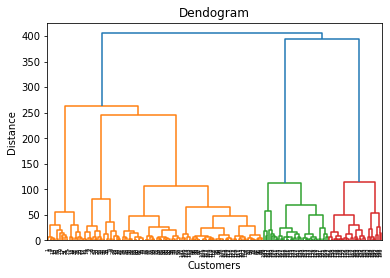

In [23]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

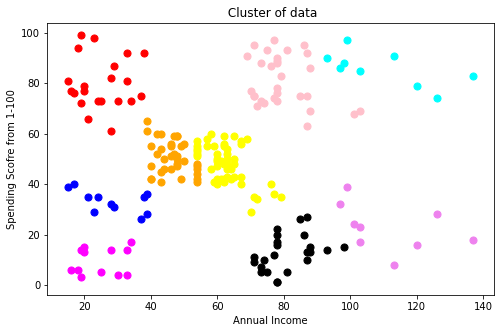

In [24]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=9,affinity='euclidean',linkage='ward')
y_ch = hc.fit_predict(X)
plt.figure(figsize=(8,5))
plt.scatter(X[y_ch == 0, 0],X[y_ch == 0, 1], s=50, c='pink')
plt.scatter(X[y_ch == 1, 0],X[y_ch == 1, 1], s=50, c='yellow')
plt.scatter(X[y_ch == 2, 0],X[y_ch == 2, 1], s=50, c='cyan')
plt.scatter(X[y_ch == 3, 0],X[y_ch == 3, 1], s=50, c='red')
plt.scatter(X[y_ch == 4, 0],X[y_ch == 4, 1], s=50, c='blue')
plt.scatter(X[y_ch == 5, 0],X[y_ch == 5, 1], s=50, c='black')
plt.scatter(X[y_ch == 6, 0],X[y_ch == 6, 1], s=50, c='violet')
plt.scatter(X[y_ch == 7, 0],X[y_ch == 7, 1], s=50, c='orange')
plt.scatter(X[y_ch == 8, 0],X[y_ch == 8, 1], s=50, c='magenta')
plt.xlabel('Annual Income')
plt.ylabel('Spending Scofre from 1-100')
plt.title(' Cluster of data')
plt.show()